#### Thanks to M. Merkel for contributing his solution to exercise 3.4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Delta_M = 2*np.random.choice(2, 1000)-1
M = np.cumsum(Delta_M)
M = np.insert(M, 0, 0) # Make array 1-indexed

### Define functions

According to [1], formula (6.5), the equation in the exercise is fulfilled for ($p=3$, using $[x]_n = n \vee 0$),

$h_n = \frac1{96} \sum_{i=1}^n f_n^{(i)}$

$g_n = 18 \sum_{i=0}^n ((x_i^*)^2 - (x_{i-1}^*)^2) f_n^{(i)}$

with $f_n^{(i)} = (x_n - x_{i-1})/\sqrt{n-(i-1 \vee 0)+\max_{i\leq k\leq n}(x_k-x_{i-1})^2}$ and $c_3 =\frac1{864} $, $C_3 = 864$.

We can also simplify 

In [3]:
def f(n, i, M):
    numerator = M_n(n) - M_n(i-1)
    max_expr = np.max((M[i:n+1] - (M[i-1] if i > 1 else 0))**2)
    denominator = np.sqrt(n - np.max(i-1, 0) + max_expr)
    return numerator/denominator

In [4]:
def h(n, M):
    return 1/96 * np.sum([f(n, i, M) for i in range(1, n+1)])

In [35]:
def g(n, M):
    diff_running_max = np.insert(np.diff(np.maximum.accumulate(M[:n+1]**2)), 0, 0)
    return 18 * np.sum([diff_running_max[i] * f(n, i, M) for i in range(n+1)])

In [6]:
def integral(h, M):
    return np.dot(h[:-1], M[1:] - M[:-1])

In [7]:
c = 1/864
C = 864

### Define the quantities of the BDG inequality

In [8]:
def running_max_power_3(M):
    return np.maximum.accumulate(np.abs(M))**3

In [42]:
def lower_bound(M):
    h_array = np.array([h(n, M) for n in range(M.shape[0])])
    return np.array([integral(h_array[:n], M[:n]) + c * n**1.5 for n in range(M.shape[0])])

In [43]:
def upper_bound(M_n):
    g_array = np.array([g(n, M) for n in range(M.shape[0])])
    return np.array([integral(g_array[:n], M[:n]) + C * n**1.5 for n in range(M.shape[0])])

In [44]:
running_max_list = running_max_power_3(M)
upper_bound_list = upper_bound(M)
lower_bound_list = lower_bound(M)

BDG is fulfilled for first part: True; and for second part: True


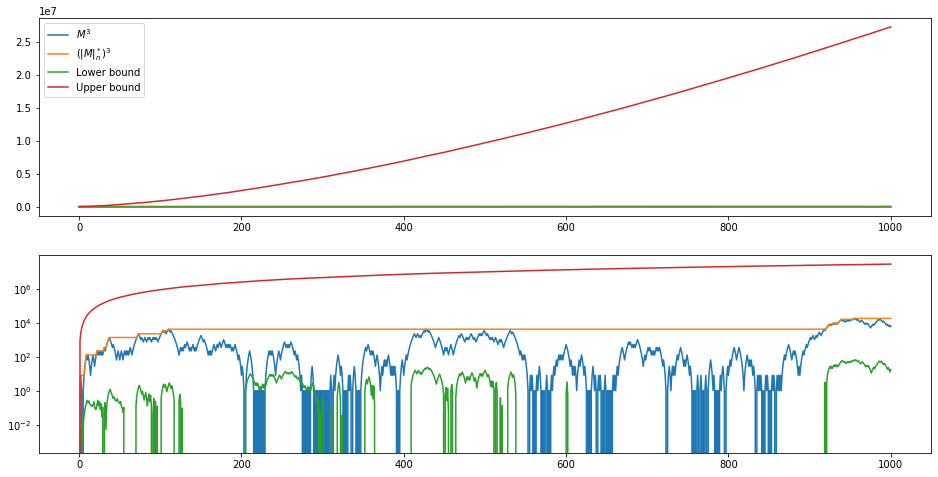

In [45]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(M**3, label='$M^3$')

plt.plot(running_max_list, label='$(|M|^*_n)^3$')
plt.plot(lower_bound_list, label='Lower bound')
plt.plot(upper_bound_list, label='Upper bound')

plt.legend()

plt.subplot(212)
plt.semilogy(np.abs(M**3))

plt.plot(running_max_list)
plt.plot(lower_bound_list)
plt.plot(upper_bound_list)

print('BDG is fulfilled for first part: {};'.format(np.all(lower_bound_list <= running_max_list)),
      'and for second part: {}'.format(np.all(running_max_list <= upper_bound_list)))